In [1]:
!pip install nltk

In [1]:
import re
re.findall, re.finditer, re.search, re.match, re.sub 

(<function re.findall(pattern, string, flags=0)>,
 <function re.finditer(pattern, string, flags=0)>,
 <function re.search(pattern, string, flags=0)>,
 <function re.match(pattern, string, flags=0)>,
 <function re.sub(pattern, repl, string, count=0, flags=0)>)

In [35]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import string, re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import line_tokenize
#from subprocess.pyplot import check_output

In [88]:
df = pd.read_csv("Apple Tweets.csv",encoding = "iso-8859-1")

In [89]:
df.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,Stocks making the biggest moves premarket: $GM...,False,0,NaN,5/31/2018 13:04,True,NaN,1.002170e+18,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",MissFitTrader,0,False,False,NaN,NaN
1,2,Stocks making the biggest moves premarket: $GM...,False,1,NaN,5/31/2018 12:35,True,NaN,1.002170e+18,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",mTradingCoach,0,False,False,NaN,NaN
2,3,Taking an $APPL entry if it can clear R1 at 18...,False,0,NaN,5/31/2018 12:11,False,NaN,1.002160e+18,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",xjlittle,0,False,False,NaN,NaN
3,4,RT @CarsPerforming: $AAGC IF YOU DON'T SEE WHA...,False,0,NaN,5/31/2018 11:36,False,NaN,1.002150e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Need4orSpeed,18,True,False,NaN,NaN
4,5,RT @CarsPerforming: $AAGC IF YOU DON'T SEE WHA...,False,0,NaN,5/31/2018 9:59,False,NaN,1.002130e+18,NaN,"<a href=""http://twitter.com/download/iphone"" r...",lt1z350,18,True,False,NaN,NaN


In [104]:
tweet = df[['text']]

In [75]:
type(tweet)

pandas.core.frame.DataFrame

In [76]:
#Data Cleaning

In [105]:
tweet = re.sub("[^a-zA-Z]"," ",tweet.to_string())

In [106]:
tweet

'                                                                                                                                                                                                                                                                                                                                                                                                                                 text                                                                                                                                                                                                                                                                                Stocks making the biggest moves premarket   GM  DG  SHLD  PVH  BOX  GES  BRKB  FB  APPL  r n r nDISCUSSING the above  amp  ot  https   t co uMZq XJxmG                                                                                                                                                            

In [108]:
tweet = tweet.lower()

In [109]:
stopwords = nltk.corpus.stopwords.words("english")
stop_list = stopwords + ['rt','url','carsperforming','aagc']

In [110]:
tweet = " ".join([word for word in tweet.split(" ") if word not in stop_list])

In [111]:
tweet

'                                                                                                                                                                                                                                                                                                                                                                                                                                 text                                                                                                                                                                                                                                                                                stocks making biggest moves premarket   gm  dg  shld  pvh  box  ges  brkb  fb  appl  r n r ndiscussing  amp  ot  https   co umzq xjxmg                                                                                                                                                                            

In [46]:
#loving, lovable, love, loved
#lematization = love

In [47]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [112]:
lemmatizer1 = nltk.stem.WordNetLemmatizer()
tweet = " ".join([lemmatizer1.lemmatize(word) for word in tweet.split(" ")])

In [49]:
tag = nltk.tag.pos_tag(tweet.split())

In [113]:
pat = re.compile(r'\s+')
sentence = re.sub(pat, " ", tweet)
sentence

' text stock making biggest move premarket gm dg shld pvh box ge brkb fb appl r n r ndiscussing amp ot http co umzq xjxmg stock making biggest move premarket gm dg shld pvh box ge brkb fb appl amp r n r ndiscussing th http co u whr buak taking appl entry clear r volume open http co rny yxgmo see whats coming know make money xrp btc ltc eth bch goog see whats coming know make money xrp btc ltc eth bch goog appl set good buy point upgrade r n r nhttps co v g ihn r nu jury award apple million samsung patent retrial portfolio management iphone r n io free dax appl gridcorerts r n r nhttps co gvx ffi see whats coming know make money xrp btc ltc eth bch goog see whats coming know make money xrp btc ltc eth bch goog see whats coming know make money xrp btc ltc eth bch goog price prediction qqq thursday may r n r ni built ai lite model predict daily price http co ibevsueq see whats coming know make money xrp btc ltc eth bch goog see whats coming know make money xrp btc ltc eth bch goog free st

In [114]:
sentence = re.sub(r'\b\w{1,3}\b','',sentence)
sentence

' text stock making biggest move premarket   shld    brkb  appl    ndiscussing   http  umzq xjxmg stock making biggest move premarket   shld    brkb  appl     ndiscussing  http    buak taking appl entry clear  volume open http   yxgmo  whats coming know make money      goog  whats coming know make money      goog appl  good  point upgrade    nhttps       jury award apple million samsung patent retrial portfolio management iphone    free  appl gridcorerts    nhttps     whats coming know make money      goog  whats coming know make money      goog  whats coming know make money      goog price prediction  thursday      built  lite model predict daily price http  ibevsueq  whats coming know make money      goog  whats coming know make money      goog free stock waiting    ntrade stock option cryptocurrencies  commission  http   pceengrl  whats coming know make money      goog  whats coming know make money      goog  whats coming know make money      goog  whats coming know make money      

In [52]:
from wordcloud import WordCloud

In [115]:
wc = WordCloud(background_color="white", width=2500, height=2000).generate(sentence)

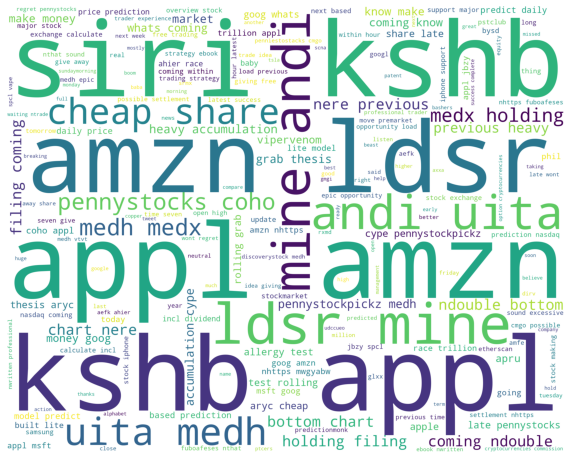

In [116]:
plt.figure(1, figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()